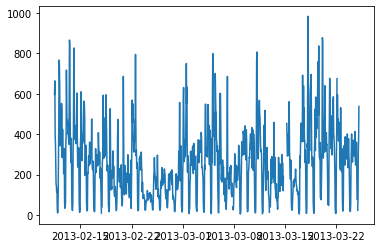

In [3]:
# load JSON
import json
import pandas
 
data = pandas.read_pickle('auber/airQualityDataframe-auber-PM10.pkl')
data = data.sort_values(by=['ds'])
df = data[1000:2000]

import matplotlib.pyplot as plt
pandas.plotting.register_matplotlib_converters() # this resolves some issues with data type
plt.plot(df['ds'],df['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


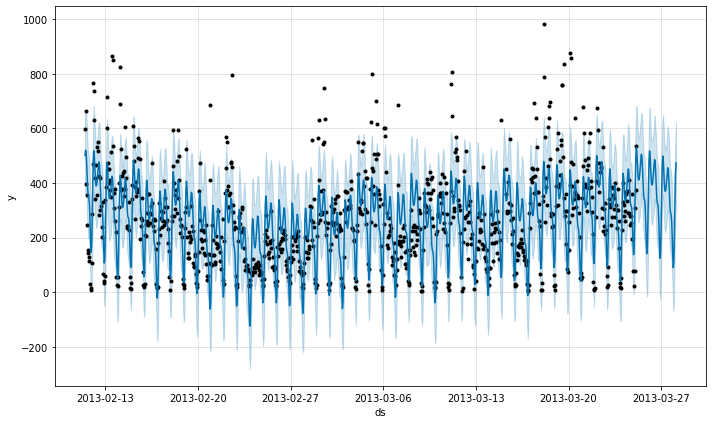

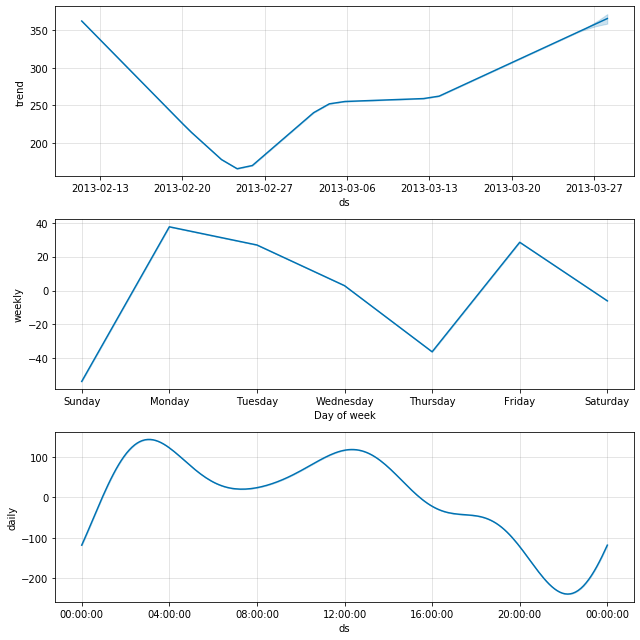

In [8]:
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale=0.1) #  Increasing scale will make the trend more flexible:
m.fit(df)
future = m.make_future_dataframe(periods=72, freq='H')
forecast = m.predict(future)
pandas.plotting.register_matplotlib_converters() # this resolves some issues with data type
fig = m.plot(forecast)
components_fig = m.plot_components(forecast)

In [6]:
# PROPHET validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='20 days', period='2 days', horizon = '3 days') # horizon: forecast ; initial: training (default: 3x horizon); 
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2013-03-04 03:00:00 and 2013-03-22 03:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-03-04 04:00:00,390.730966,260.400579,528.586357,307.0,2013-03-04 03:00:00
1,2013-03-04 05:00:00,349.703562,221.135392,473.289941,298.0,2013-03-04 03:00:00
2,2013-03-04 06:00:00,331.665870,198.166496,475.960775,292.0,2013-03-04 03:00:00
3,2013-03-04 07:00:00,331.372937,199.984348,470.046712,330.0,2013-03-04 03:00:00
4,2013-03-04 08:00:00,335.183810,208.952539,464.609661,337.0,2013-03-04 03:00:00


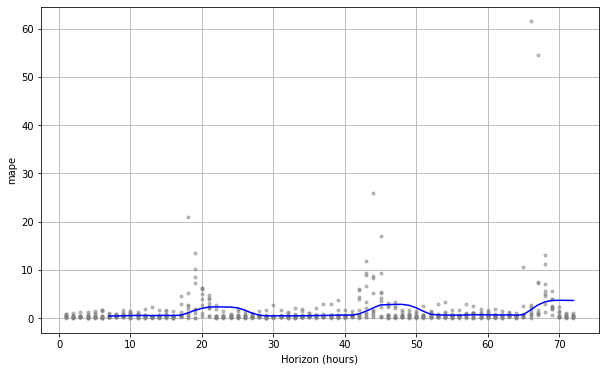

In [7]:
# Performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

# mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE)
# computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff).
# By default, 10% of the predictions in each window (can be changed) 
# high rollingwindow --> smoother average curve 

# Visualize cross-validation
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
